<a href="https://colab.research.google.com/github/viniciusguirra/Analise_sentimentos_vgo/blob/main/analises_de_sentimento_vinicius_guirra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimento
* Objetivo: Elabore um serviço que seja capaz de detectar se uma determinada frase inserida corresponde a um destes sentimentos (felicidade, tristeza e raiva)



### Importação de bibliotecas

In [1]:
import random
from textblob import Word
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

* random: Usado para seleção aleatória de frases originais.
* textblob: Usado para a manipulação de palavras.
* nltk.corpus.wordnet: Usado para encontrar sinônimos.
* nltk: Biblioteca de processamento de linguagem natural.
* nltk.download('wordnet'): Baixa os dados necessários para usar o WordNet, um banco de dados lexical de inglês.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

*  bibliotecas necessárias para a vetorização de texto (TF-IDF), treinamento de um modelo de SVM (Support Vector Machine), avaliação do modelo por meio de métricas de classificação e visualização da matriz de confusão. Além disso, é feito o download de recursos adicionais do NLTK (lista de stopwords e tokenizador

### Definição de Frases Originais:

In [3]:
# Frases originais
frases = [
    "Estou muito feliz hoje",
    "Estou triste por causa do resultado",
    "Estou com raiva por causa do comportamento dela",
    "Estou me sentindo ótimo",
    "Que notícia triste",
    "Estou irritado com essa situação"
]

### Função para Encontrar Sinônimos:

In [4]:
# Função para encontrar sinônimos de uma palavra
def get_synonyms(word):
    synonyms = set()
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

### Função para Gerar Frases com Sentimentos Variados:

In [5]:
# Gerar frases com sentimentos variados
def generate_dataset(frases, num_samples):
    dataset = []
    for _ in range(num_samples):
        original_frase = random.choice(frases)
        sentiment = None
        if "feliz" in original_frase:
            sentiment = "felicidade"
        elif "triste" in original_frase:
            sentiment = "tristeza"
        elif "raiva" in original_frase:
            sentiment = "raiva"

        # Adicionar variações de palavras com o mesmo sentimento
        if sentiment:
            words = original_frase.split()
            for i, word in enumerate(words):
                synonyms = get_synonyms(word)
                if synonyms:
                    synonym = random.choice(synonyms)
                    words[i] = synonym
            new_frase = " ".join(words)
            dataset.append((new_frase, sentiment))

    return dataset

* Esta função gera um conjunto de dados (dataset) contendo uma quantidade especificada de amostras (num_samples). Ele seleciona aleatoriamente uma frase original, determina o sentimento da frase e substitui algumas palavras por sinônimos relacionados ao mesmo sentimento. As frases modificadas são adicionadas ao dataset com o seu respectivo sentimento

### Geração do Dataset

In [6]:
# Gerar dataset
dataset = generate_dataset(frases, 30000)

# Exibir algumas amostras
for i in range(10):
    print(dataset[i])

('Estou triste por suit fare resultado', 'tristeza')
('Estou triste por case perform resultado', 'tristeza')
('Estou com raiva por cause perform comportamento dela', 'raiva')
('Estou com raiva por case coiffe comportamento dela', 'raiva')
('Que notícia triste', 'tristeza')
('Estou triste por suit come resultado', 'tristeza')
('Estou muito feliz hoje', 'felicidade')
('Estou triste por causa act resultado', 'tristeza')
('Estou muito feliz hoje', 'felicidade')
('Estou triste por case doh resultado', 'tristeza')


In [7]:
# viualização dos dados do dataset
dataset

[('Estou triste por suit fare resultado', 'tristeza'),
 ('Estou triste por case perform resultado', 'tristeza'),
 ('Estou com raiva por cause perform comportamento dela', 'raiva'),
 ('Estou com raiva por case coiffe comportamento dela', 'raiva'),
 ('Que notícia triste', 'tristeza'),
 ('Estou triste por suit come resultado', 'tristeza'),
 ('Estou muito feliz hoje', 'felicidade'),
 ('Estou triste por causa act resultado', 'tristeza'),
 ('Estou muito feliz hoje', 'felicidade'),
 ('Estou triste por case doh resultado', 'tristeza'),
 ('Estou com raiva por suit coiffure comportamento dela', 'raiva'),
 ('Estou triste por case make resultado', 'tristeza'),
 ('Estou com raiva por suit behave comportamento dela', 'raiva'),
 ('Que notícia triste', 'tristeza'),
 ('Que notícia triste', 'tristeza'),
 ('Estou muito feliz hoje', 'felicidade'),
 ('Estou muito feliz hoje', 'felicidade'),
 ('Que notícia triste', 'tristeza'),
 ('Estou triste por causa practise resultado', 'tristeza'),
 ('Estou muito feliz

In [8]:
dataset.count

<function list.count(value, /)>

### Criando gerador de sentimentos

In [9]:
# Função de pré-processamento de texto
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

Definição de uma função preprocess_text para realizar pré-processamento de texto. Isso inclui a remoção de stopwords em português e a conversão do texto para minúsculas.

In [10]:
# Dados de exemplo
corpus = generate_dataset(frases, 30000)

Geração de um corpus de exemplo usando a função generate_dataset, que foi definida anteriormente. Este corpus será usado para treinar o modelo SVM.

In [11]:
# Separar os textos e os rótulos
texts = [preprocess_text(text) for text, label in corpus]
labels = [label for text, label in corpus]

Separar o corpus em textos e rótulos. Os textos são pré-processados usando a função preprocess_text e os rótulos são mantidos intactos.

In [12]:
# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

Utilização da classe TfidfVectorizer do Scikit-Learn para vetorizar os textos pré-processados usando a abordagem TF-IDF (Term Frequency-Inverse Document Frequency).

In [13]:

# Treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X, labels)

SVC(kernel='linear')

Treinamento de um modelo de SVM com um kernel linear usando os textos vetorizados e seus rótulos correspondentes.


In [14]:
# Avaliar o modelo
y_pred = svm_model.predict(X)
print("Avaliação do Modelo:")
print(classification_report(labels, y_pred))

Avaliação do Modelo:
              precision    recall  f1-score   support

  felicidade       1.00      1.00      1.00      5069
       raiva       1.00      1.00      1.00      4944
    tristeza       1.00      1.00      1.00     10076

    accuracy                           1.00     20089
   macro avg       1.00      1.00      1.00     20089
weighted avg       1.00      1.00      1.00     20089



Avaliação do modelo SVM treinado usando métricas de classificação, como precisão, recall e F1-score, para cada classe.

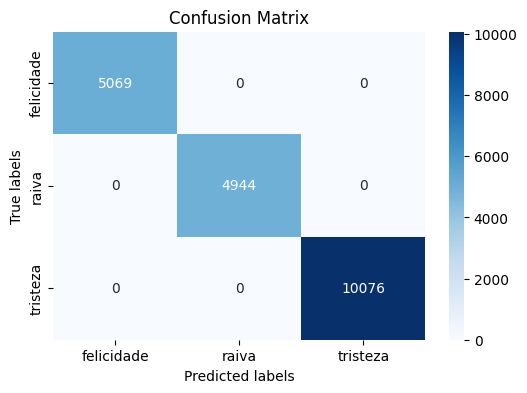

In [15]:
# Exibir a matriz de confusão
conf_matrix = confusion_matrix(labels, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Visualização da matriz de confusão para avaliar o desempenho do modelo. A matriz de confusão mostra a quantidade de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos para cada classe prevista.

In [29]:
# Pedir ao usuário para inserir a frase
user_input = input("Como está se sentindo hoje ? : ")
user_input_processed = preprocess_text(user_input)
# Transformar a frase do usuário em um vetor usando o vetorizador TF-IDF
user_input_vectorized = vectorizer.transform([user_input_processed])
# Fazer a previsão de sentimento
prediction = svm_model.predict(user_input_vectorized)
print("Sentimento detectado:", prediction[0])


Como está se sentindo hoje ? : estou triste 
Sentimento detectado: tristeza


Solicita ao usuário que insira uma frase para determinar o sentimento.
A frase inserida pelo usuário é pré-processada usando a função preprocess_text() definida anteriormente. Isso remove stopwords e converte o texto para minúsculas.
A frase do usuário pré-processada é transformada em um vetor usando o vetorizador TF-IDF que foi treinado anteriormente com o dataset.
O modelo SVM treinado é usado para fazer uma previsão do sentimento com base na frase do usuário vetorizada.
O sentimento detectado é impresso na saída. O [0] é usado porque predict() retorna uma lista de previsões, mas neste caso, só temos uma única previsão.